In [4]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [26]:
N, D, H = 64, 1000, 100
x       = tf.placeholder(tf.float32, shape=(N, D))

y       = tf.placeholder(tf.float32, shape=(N, D))

w1      = tf.Variable(tf.random_normal((D,H)),name="w1")

w2      = tf.Variable(tf.random_normal((H,D)),name="w2")

h       = tf.maximum(tf.matmul(x, w1), 0)

y_pred  = tf.matmul(h, w2)

diff    = y_pred - y  

loss    = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grade_w1,grade_w2 = tf.gradients(loss,[w1,w2])

In [37]:
first_moment_w1,first_moment_w2,second_moment_w1,second_moment_w2=0,0,0,0

learning_rate=1e-4

beta1=0.9
beta2=0.999

first_moment_w1  = beta1*first_moment_w1+(1-beta1)*grade_w1

second_moment_w1 = beta2*second_moment_w1+(1-beta2)*grade_w1*grade_w1

#first_unbias_w1  = first_moment_w1  / (1 - beta1 ** i)

#second_unbias_w1 = second_moment_w1 / (1- beta2 ** i)

new_w1           = w1.assign(w1 - learning_rate * first_moment_w1/(tf.sqrt(second_moment_w1) + 1e-7))


first_moment_w2  = beta1*first_moment_w2+(1-beta1)*grade_w2

second_moment_w2 = beta2*second_moment_w2+(1-beta2)*grade_w2*grade_w2

#first_unbias_w2  = first_moment_w2  / (1 - beta1 ** i)

#second_unbias_w2 = second_moment_w2 / (1- beta2 ** i)

new_w2           = w2.assign(w2 - learning_rate * first_moment_w2/(tf.sqrt(second_moment_w2) + 1e-7))

Update           = tf.group(new_w1,new_w2)






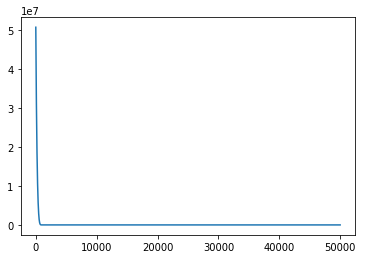

[50730720.0, None] [34.63195, None]


In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}
    
    loss_summery=[]
    steps =50000
    for t in range(steps):
        out      = sess.run([loss,Update],feed_dict=values)
        loss_val = out
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery)
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])

    
